#### Introduction
The algorithm, given a directed graph and a starting vertex, it will find the shortest paths between the starting vertex and all vertices it can reach. The algorithm only works when the paths have non negative edges connecting the vertices.

Thus, given a graph G = (V, E), a starting vertex s $\in$ V and non negative edges of length $l_e$ where e $\in$ E, the output of the algorithm is dist(s, v) for every vertex v $\in$ V

The dist(s, v) denotes the shortest distance from s to v and dist(s, v) = $\infty$ if there is no path from s to a vertex v.
***
We have seen how BFS can be used to find the shortest path to any vertex from a vertex. This is a special case of graph where each edge has unit length. Djikstra's algorithm is more generic in a way where each edge can have a weight of non positive value.

But can we reduce this graph to a graph where edges are of unit length? That is, if an edge between two vertices have a weight 5, we can replace this edge (with the two vertices) with 5 vertices connected one after other with each edge length of 1 as seen in the following graph



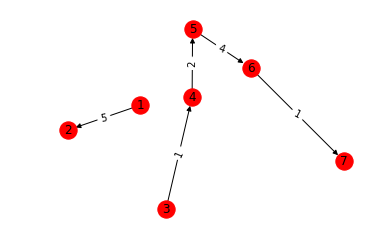

In [70]:
%matplotlib inline
import networkx as nx

DG = nx.DiGraph()
edges = [(1, 2, 5), (3, 4, 1), (4, 5, 2), (5, 6, 4), (6, 7, 1)]
DG.add_weighted_edges_from(edges)
pos = nx.spring_layout(DG,k=0.55,iterations=20)
   # k controls the distance between the nodes and varies between 0 and 1
    # iterations is the number of times simulated annealing is run
    # default k =0.1 and iterations=50
weights =nx.get_edge_attributes(DG, 'weight')
nx.draw_networkx_edge_labels(DG, pos=pos,  edge_labels = weights)
nx.draw(DG, pos=pos, with_labels = True)

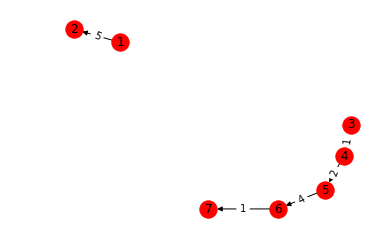

In [72]:
pos = nx.spring_layout(DG)    # spring_layout randomness causes pos to be random
nx.draw_networkx_edge_labels(DG, pos=pos,  edge_labels = weights)
nx.draw(DG, pos=pos, with_labels = True)

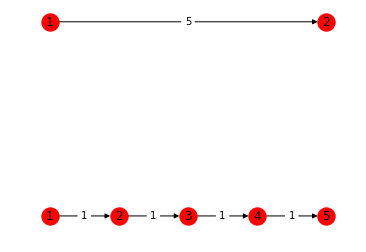

In [21]:
%matplotlib inline
import networkx as nx

g1 = nx.DiGraph()
g1.add_node(1, pos = (0, 5))
g1.add_node(2, pos = (20, 5))
g1.add_edge(1, 2, weight = 5)
pos = nx.get_node_attributes(g1, 'pos')
weights =nx.get_edge_attributes(g1, 'weight')
nx.draw_networkx_edge_labels(g1, pos, edge_labels = weights)
nx.draw(g1, pos, with_labels = True)

g2 = nx.DiGraph()
g2.add_node(1, pos = (0, 0))
g2.add_node(2, pos = (5, 0))
g2.add_node(3, pos = (10, 0))
g2.add_node(4, pos = (15, 0))
g2.add_node(5, pos = (20, 0))
g2.add_edge(1, 2, weight = 1)
g2.add_edge(2, 3, weight = 1)
g2.add_edge(3, 4, weight = 1)
g2.add_edge(4, 5, weight = 1)
pos = nx.get_node_attributes(g2, 'pos')
weights =nx.get_edge_attributes(g2, 'weight')
nx.draw_networkx_edge_labels(g2, pos, edge_labels = weights)
nx.draw(g2, pos, with_labels = True)

The idea sounds right and also works well for small graphs with small length edges. But imagine graphs with vertices of length order or magnitude larger than the number of vertices in a graph (e.g. two vertices connected by edge of length 100 gets transformed to a graoh with 100 vertices each of unit length).

Though BFS runs in linear time of the input graph size, the transformed graph is way larger that the original graph and hence the time complexity is no longer linear with respect to the original input graph and thus this appoach, though clever doesn't practically scale to all graphs.
***
# Dijkstra's Shortest-Path Algorithm
Let us now look at an implementation of Djikstra's algorithm. Though the implementation here can use heap, we will not use it and stick to the approach the Pseudo code gives in thic chapter. This implementation will use Heap in future notebook and we will be able to appreciate the how the choice of right datastructure is crucial even for the same algorithm

## Dijkstra's Algorithm Naive implementation

Printing minimum distances from starting vertex 1
Vertex 1 is at distance 0
Vertex 2 is at distance 1
Vertex 3 is at distance 3
Vertex 4 is at distance 6


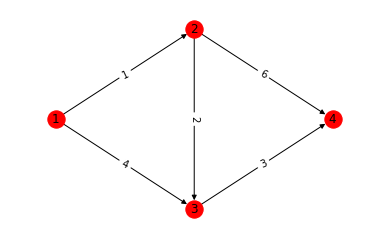

In [47]:
%matplotlib inline
import networkx as nx

def djikstra_naive(DG, source):
    #Naive implementation which does the following
    #
    # 1. For vertices in X, find all edges originating from them to all vertices not in X
    # 2. Keep track of minimum value of len(w) + lwv
    # 3. Return w, v and lwv
    X = [source]
    A = {}
    A[source] = 0
    all_nodes = list(DG.nodes)
    minimum_2nd_overall = float('inf')
    w_overall = float('inf')
    while len(X) != len(all_nodes):
        for edge in list(DG.edges):
            if (edge[0] in X) and (edge[1] not in X):
                dji_greedy = A[edge[0]] + DG.edges[edge[0], edge[1]]['weight'] #djikstra's greedy criterion
                if edge[1] not in A:
                    A[edge[1]] = dji_greedy
                elif dji_greedy < A[edge[1]]:
                    A[edge[1]] = dji_greedy
                if dji_greedy < minimum_2nd_overall:
                    minimum_2nd_overall = dji_greedy
                    w_overall = edge[1]  
        minimum_2nd_overall = float('inf')
        X.append(w_overall)
    print("Printing minimum distances from starting vertex {}".format(source))
    for node in A:
        print("Vertex {} is at distance {}".format(node, A[node]))
        
        

DG = nx.DiGraph()
DG.add_node(1, pos = (0, 5))
DG.add_node(2, pos = (7, 10))
DG.add_node(3, pos = (7, 0))
DG.add_node(4, pos = (14, 5))
DG.add_edge(1, 2, weight = 1)
DG.add_edge(2, 3, weight = 2)
DG.add_edge(3, 4, weight = 3)
DG.add_edge(1, 3, weight = 4)
DG.add_edge(2, 4, weight = 6)
pos = nx.get_node_attributes(DG, 'pos')
weights =nx.get_edge_attributes(DG, 'weight')
nx.draw_networkx_edge_labels(DG, pos, edge_labels = weights)
nx.draw(DG, pos, with_labels = True)

djikstra_naive(DG, 1)

Printing minimum distances from starting vertex s
Vertex s is at distance 0
Vertex t is at distance 6
Vertex w is at distance 3
Vertex v is at distance 1


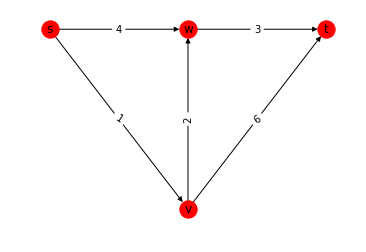

In [48]:
import networkx as nx
g = nx.DiGraph()
g.add_node('s', pos = (0, 5))
g.add_node('v', pos = (5, 0))
g.add_node('w', pos = (5, 5))
g.add_node('t', pos = (10, 5))
g.add_edge('s', 'v', weight = 1)
g.add_edge('v', 't', weight = 6)
g.add_edge('s', 'w', weight = 4)
g.add_edge('v', 'w', weight = 2)
g.add_edge('w', 't', weight = 3)
pos = nx.get_node_attributes(g, 'pos')
weights = nx.get_edge_attributes(g, 'weight')
nx.draw_networkx_edge_labels(g, pos, edge_labels = weights)
nx.draw(g, pos, with_labels = True)

start_vert = 's'
djikstra_naive(g, start_vert)

##### Problem 9.8

Solved earlier.

Printing minimum distances from starting vertex a
Vertex a is at distance 0
Vertex c is at distance -3
Vertex b is at distance 1
Vertex e is at distance 0
Vertex d is at distance -6
Vertex g is at distance -1
Vertex f is at distance -1


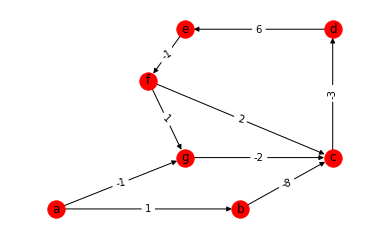

In [49]:
import networkx as nx
g = nx.DiGraph()
g.add_node('a', pos = (0, 5))
g.add_node('b', pos = (10, 5))
g.add_edge('a', 'b', weight = 1)

g.add_node('c', pos = (15, 7))
g.add_edge('b', 'c', weight = -8)

g.add_node('d', pos = (15, 12))
g.add_edge('c', 'd', weight = -3)

g.add_node('e', pos = (7, 12))
g.add_edge('d', 'e', weight = 6)

g.add_node('f', pos = (5, 10))
g.add_edge('e', 'f', weight = -1)
g.add_edge('f', 'c', weight = 2)

g.add_node('g', pos = (7, 7))
g.add_edge('f', 'g', weight = 1)
g.add_edge('g', 'c', weight = -2)
g.add_edge('a', 'g', weight = -1)

pos = nx.get_node_attributes(g, 'pos')
weights = nx.get_edge_attributes(g, 'weight')
nx.draw_networkx_edge_labels(g, pos, edge_labels = weights)
nx.draw(g, pos, with_labels = True)

djikstra_naive(g, 'a')

As we see in the above graph, we have two directed cycles g -> c -> d -> e -> f -> g and c -> d -> e -> f -> c. Both have non negative sum of lengths. Still, the shortest distance using Djikstra algorithm for c will be calculated as -3 where the true shortest distance is -7. All vertices that gets pulled into frontier after c will be incorrect. For the above graph, except g and b, the distances will be incorrect. Following code snippet demonstrates the incorrect path lengths


## More Problems

**Problem 1: ** <br>
In lecture we define the length of a path to be the sum of the lengths of its edges. Define the bottleneck of a path to be the maximum length of one of its edges. A mininum-bottleneck path between two vertices s and t is a path with bottleneck no larger than that of any other s-t path. Show how to modify Dijkstra's algorithm to compute a minimum-bottleneck path between two given vertices. The running time should be $O(m \log n)$, as in lecture.


bottleneck[2] = 1
bottleneck[2] = 1
bottleneck[3] = 4
bottleneck[3] = 4
bottleneck[3] = 2
bottleneck[4] = 6
bottleneck[4] = 6
bottleneck[4] = 3
Printing minimum-bottleneck path from starting vertex 1
Vertex 1 has a minimum-bottleneck of 0 having path ['1']
Vertex 2 has a minimum-bottleneck of 1 having path ['1', '2']
Vertex 3 has a minimum-bottleneck of 2 having path ['1', '2', '3']
Vertex 4 has a minimum-bottleneck of 3 having path ['1', '2', '3', '4']


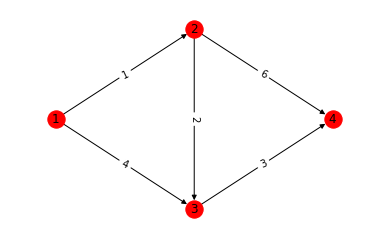

In [81]:
%matplotlib inline
import networkx as nx

def minimum_bottleneck_path_naive(DG, source):
    X = [source]
    A = {}
    A[source] = 0
    B = {}
    B[source] = str(source)
    bottleneck = {}
    bottleneck[source] = 0
    all_nodes = list(DG.nodes)
    minimum_2nd_overall = float('inf')
    w_overall = float('inf')
    v_overall = float('inf')
    while len(X) != len(all_nodes):
        for edge in list(DG.edges):
            if (edge[0] in X) and (edge[1] not in X):
                dji_greedy = DG.edges[edge[0], edge[1]]['weight'] #bottleneck criterion
                if edge[1] not in A:
                    A[edge[1]] = dji_greedy
                    bottleneck[edge[1]] = dji_greedy
                    print("bottleneck[{}] = {}".format(edge[1] , bottleneck[edge[1]]))
                elif dji_greedy < A[edge[1]]:
                    A[edge[1]] = dji_greedy
                    #if dji_greedy > bottleneck[edge[1]]:
                    #    bottleneck[edge[1]] = dji_greedy
                if dji_greedy < minimum_2nd_overall:
                    minimum_2nd_overall = dji_greedy
                    if dji_greedy > bottleneck[edge[0]]:
                        bottleneck[edge[1]] = dji_greedy
                        print("bottleneck[{}] = {}".format(edge[1] , bottleneck[edge[1]]))
                    w_overall = edge[1] 
                    v_overall = edge[0] 
        minimum_2nd_overall = float('inf')
        X.append(w_overall)
        B[w_overall] = B[v_overall] +','+ str(w_overall)
        
    print("Printing minimum-bottleneck path from starting vertex {}".format(source))
    for node in A:
        #path_nodes = [int(i) for i in B[node].split(',')]
        print("Vertex {} has a minimum-bottleneck of {} having path {}".format(node, bottleneck[node], B[node].split(',')))
        
        

DG = nx.DiGraph()
DG.add_node(1, pos = (0, 5))
DG.add_node(2, pos = (7, 10))
DG.add_node(3, pos = (7, 0))
DG.add_node(4, pos = (14, 5))
DG.add_edge(1, 2, weight = 1)
DG.add_edge(2, 3, weight = 2)
DG.add_edge(3, 4, weight = 3)
DG.add_edge(1, 3, weight = 4)
DG.add_edge(2, 4, weight = 6)
pos = nx.get_node_attributes(DG, 'pos')
weights =nx.get_edge_attributes(DG, 'weight')
nx.draw_networkx_edge_labels(DG, pos, edge_labels = weights)
nx.draw(DG, pos, with_labels = True)

minimum_bottleneck_path_naive(DG, 1)

bottleneck[w] = 4
bottleneck[w] = 4
bottleneck[v] = 1
bottleneck[v] = 1
bottleneck[w] = 4
bottleneck[t] = 6
bottleneck[w] = 2
bottleneck[t] = 3
Printing minimum-bottleneck path from starting vertex s
Vertex s has a minimum-bottleneck of 0 having path ['s']
Vertex t has a minimum-bottleneck of 3 having path ['s', 'v', 'w', 't']
Vertex w has a minimum-bottleneck of 2 having path ['s', 'v', 'w']
Vertex v has a minimum-bottleneck of 1 having path ['s', 'v']


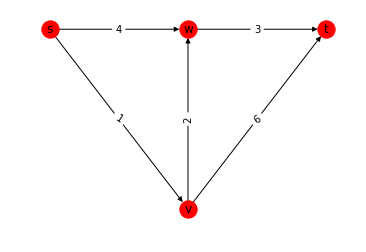

In [82]:
import networkx as nx
g = nx.DiGraph()
g.add_node('s', pos = (0, 5))
g.add_node('v', pos = (5, 0))
g.add_node('w', pos = (5, 5))
g.add_node('t', pos = (10, 5))
g.add_edge('s', 'v', weight = 1)
g.add_edge('v', 't', weight = 6)
g.add_edge('s', 'w', weight = 4)
g.add_edge('v', 'w', weight = 2)
g.add_edge('w', 't', weight = 3)
pos = nx.get_node_attributes(g, 'pos')
weights = nx.get_edge_attributes(g, 'weight')
nx.draw_networkx_edge_labels(g, pos, edge_labels = weights)
nx.draw(g, pos, with_labels = True)

start_vert = 's'
minimum_bottleneck_path_naive(g, start_vert)

bottleneck[a] = 5
bottleneck[a] = 5
bottleneck[d] = 8
bottleneck[g] = 4
bottleneck[g] = 4
bottleneck[h] = 20
bottleneck[h] = 20
bottleneck[a] = 5
bottleneck[b] = 5
bottleneck[f] = 1
bottleneck[t] = 2
bottleneck[t] = 2
bottleneck[c] = 3
bottleneck[h] = 20
bottleneck[d] = 8
bottleneck[e] = 9
bottleneck[e] = 9
bottleneck[h] = 20
bottleneck[i] = 2
Printing minimum-bottleneck path from starting vertex s
Vertex a has a minimum-bottleneck of 5 having path ['s', 'a']
Vertex c has a minimum-bottleneck of 3 having path ['s', 'a', 'b', 'c']
Vertex b has a minimum-bottleneck of 5 having path ['s', 'a', 'b']
Vertex e has a minimum-bottleneck of 9 having path ['s', 'd', 'e']
Vertex d has a minimum-bottleneck of 8 having path ['s', 'd']
Vertex g has a minimum-bottleneck of 4 having path ['s', 'g']
Vertex f has a minimum-bottleneck of 1 having path ['s', 'a', 'f']
Vertex i has a minimum-bottleneck of 2 having path ['s', 'g', 'h', 'i']
Vertex h has a minimum-bottleneck of 20 having path ['s', 'g', 'h']

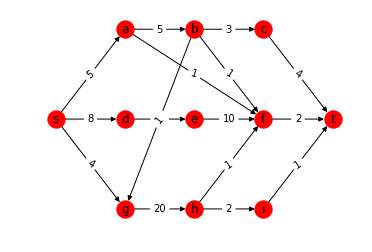

In [83]:
import networkx as nx
g = nx.DiGraph()
g.add_node('s', pos = (0, 5))
g.add_node('a', pos = (5, 10))
g.add_node('b', pos = (10, 10))
g.add_node('c', pos = (15, 10))
g.add_node('d', pos = (5, 5))
g.add_node('e', pos = (10, 5))
g.add_node('f', pos = (15, 5))
g.add_node('g', pos = (5, 0))
g.add_node('h', pos = (10, 0))
g.add_node('i', pos = (15, 0))
g.add_node('t', pos = (20, 5))
g.add_edge('s', 'a', weight = 5)
g.add_edge('a', 'b', weight = 5)
g.add_edge('b', 'c', weight = 3)
g.add_edge('c', 't', weight = 4)
g.add_edge('s', 'd', weight = 8)
g.add_edge('d', 'e', weight = 9)
g.add_edge('e', 'f', weight = 10)
g.add_edge('f', 't', weight = 2)
g.add_edge('s', 'g', weight = 4)
g.add_edge('g', 'h', weight = 20)
g.add_edge('h', 'i', weight = 2)
g.add_edge('i', 't', weight = 1)
g.add_edge('a', 'f', weight = 1)
g.add_edge('b', 'f', weight = 1)
g.add_edge('b', 'g', weight = 1)
g.add_edge('h', 'f', weight = 1)
g.add_edge('i', 't', weight = 1)
pos = nx.get_node_attributes(g, 'pos')
weights = nx.get_edge_attributes(g, 'weight')
nx.draw_networkx_edge_labels(g, pos, edge_labels = weights)
nx.draw(g, pos, with_labels = True)

start_vert = 's'
minimum_bottleneck_path_naive(g, start_vert)

**Problem 2: ** <br>
We can do better. Suppose now that the graph is undirected. Give a linear-time ($O(m)$) algorithm to compute a minimum-bottleneck path between two given vertices.

**Problem 3: ** <br>
What if the graph is directed? Can you compute a minimum-bottleneck path between two given vertices faster than $O(m \log n)$ ?